In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
# import sys
# print(sys.executable)
# source activate gpu
# python -m ipykernel install --user --name gpu --display-name "Python (myenv)"
# sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [4]:
df = pd.read_csv('./training.1600000.processed.noemoticon.csv/training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
data = df.drop(['id', 'date', 'query', 'user_id'], axis=1)
data.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


<AxesSubplot:>

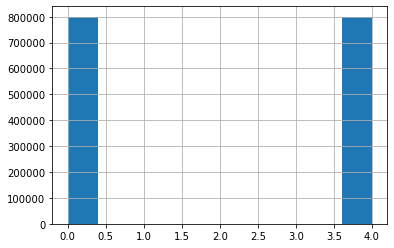

In [6]:
data.sentiment.hist()

In [7]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
data.sentiment = data.sentiment.apply(lambda x: label_decoder(x))
data.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


In [8]:
import random
random_idx_list = [random.randint(1,len(data.text)) for i in range(10)]
data.loc[random_idx_list,:].head(10)

,sentiment,text
24260,Negative,needs 2 reevaluate her actions dis wknd....she...
851132,Positive,"@tvprincess God heard me, thunderstorm only on..."
377566,Negative,@dtothealex it makes me feel like a big loser
14647,Negative,It's been the longest day ever! I still haven'...
1403541,Positive,"@ranajay Well, at least you were still in scho..."
83939,Negative,chem chem revisionnnn
740727,Negative,Got my new iPhone Friday. It's not such a big ...
302631,Negative,Hooters with Adrian. I still can't believe he'...
1399180,Positive,Am so full. . American buffet
1442769,Positive,@michellehendra thk you!!! @sherly_eggie


In [9]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [10]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

data.text = data.text.apply(lambda x: preprocess(x))

In [11]:
data.head(10)

,sentiment,text
0,Negative,awww bummer shoulda got david carr third day
1,Negative,upset update facebook texting might cry result...
2,Negative,dived many times ball managed save 50 rest go ...
3,Negative,whole body feels itchy like fire
4,Negative,behaving mad see
5,Negative,whole crew
6,Negative,need hug
7,Negative,hey long time see yes rains bit bit lol fine t...
8,Negative,nope
9,Negative,que muera


In [12]:
# pip install WordCloud

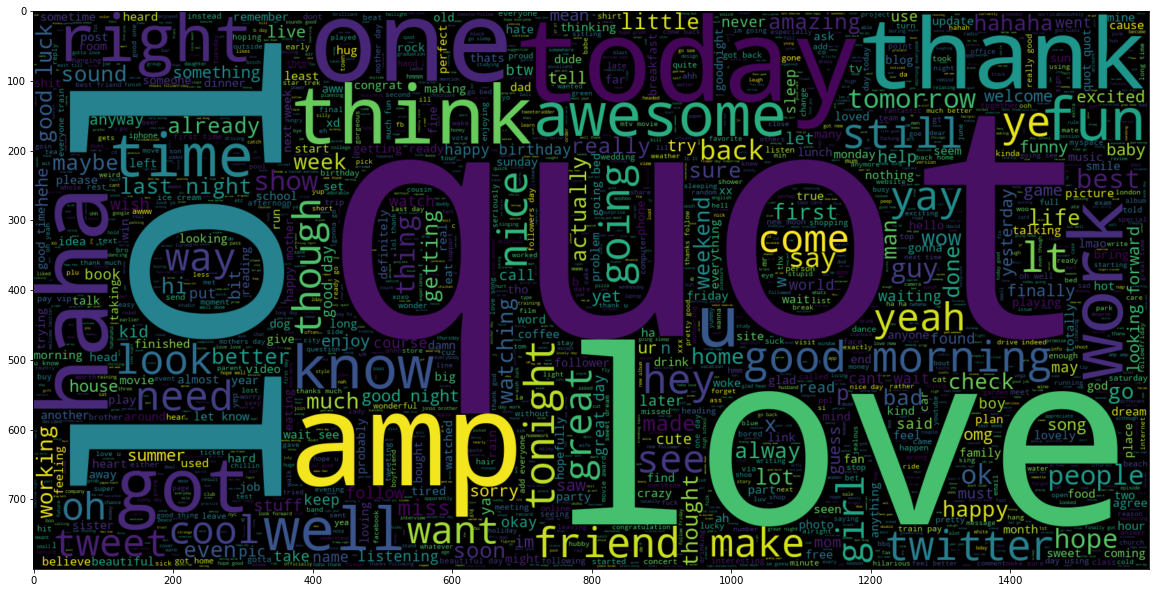

In [13]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

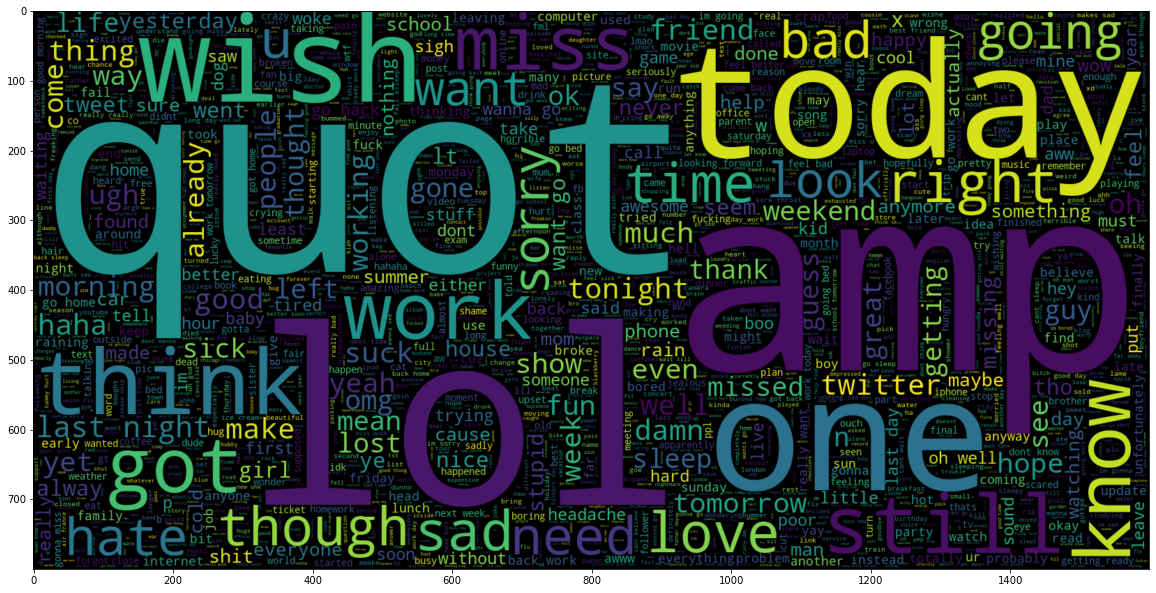

In [14]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [15]:
train_data, test_data = train_test_split(data, test_size=0.2,random_state=7) 
train_data.head(10)

,sentiment,text
23786,Negative,need friends
182699,Negative,im trying call impossible
476661,Negative,good pace going 3k 13 min missed 5k turn ended...
1181490,Positive,u gonna shows ny soon luv see u live
878773,Positive,hell yea get em tattoos ink free wish parents ...
130866,Negative,yeah need 2 see ur mom calls back first rememb...
1235876,Positive,sounds like cup tea sign
717314,Negative,tired want sleep wtf
969880,Positive,amazing wish
748698,Negative,thank god wkrn abc affiliate nashville back mi...


In [16]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 290575


In [17]:
word_index

{'good': 1,
 'day': 2,
 'get': 3,
 'like': 4,
 'go': 5,
 'quot': 6,
 'today': 7,
 'work': 8,
 'love': 9,
 'going': 10,
 'got': 11,
 'lol': 12,
 'time': 13,
 'back': 14,
 'u': 15,
 'one': 16,
 'know': 17,
 'im': 18,
 'really': 19,
 'amp': 20,
 'see': 21,
 'night': 22,
 'still': 23,
 '2': 24,
 'well': 25,
 'new': 26,
 'want': 27,
 'think': 28,
 'home': 29,
 'thanks': 30,
 'oh': 31,
 'much': 32,
 'miss': 33,
 'need': 34,
 'last': 35,
 'morning': 36,
 'hope': 37,
 'tomorrow': 38,
 'great': 39,
 'twitter': 40,
 '3': 41,
 'haha': 42,
 'feel': 43,
 'sad': 44,
 'fun': 45,
 'wish': 46,
 'right': 47,
 'sleep': 48,
 'bad': 49,
 'would': 50,
 'happy': 51,
 'sorry': 52,
 'tonight': 53,
 'come': 54,
 'make': 55,
 'getting': 56,
 'way': 57,
 'though': 58,
 'gonna': 59,
 'nice': 60,
 'better': 61,
 'watching': 62,
 'yeah': 63,
 'wait': 64,
 'bed': 65,
 'could': 66,
 'week': 67,
 'people': 68,
 'school': 69,
 'hate': 70,
 'even': 71,
 'days': 72,
 'hey': 73,
 '4': 74,
 'yes': 75,
 'next': 76,
 'lt': 77

In [18]:
from keras.preprocessing.sequence import pad_sequences

MAX_NB_WORDS = 1,00,000
MAX_SEQUENCE_LENGTH = 30

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


In [19]:
labels = train_data.sentiment.unique().tolist()
labels

['Negative', 'Positive']

In [20]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


In [21]:
GLOVE_EMB = './glove.6B/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10

In [22]:
embeddings_index = {}

f = open(GLOVE_EMB,encoding="utf8")

for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [23]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [24]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [25]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [26]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [28]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")
print(tf.config.list_physical_devices('GPU'))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on GPU...
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 496s 387ms/step - loss: 0.5193 - accuracy: 0.7390 - val_loss: 0.4816 - val_accuracy: 0.7657
Epoch 2/10
1250/1250 [==============================] - 734s 587ms/step - loss: 0.4877 - accuracy: 0.7619 - val_loss: 0.4721 - val_accuracy: 0.7721
Epoch 3/10
1250/1250 [==============================] - 710s 568ms/step - loss: 0.4771 - accuracy: 0.7691 - val_loss: 0.4660 - val_accuracy: 0.7759
Epoch 4/10
1250/1250 [==============================] - 749s 599ms/step - loss: 0.4710 - accuracy: 0.7729 - val_loss: 0.4629 - val_accuracy: 0.7787
Epoch 5/10
1250/1250 [==============================] - 641s 513ms/step - loss: 0.4664 - accuracy: 0.7758 - val_loss: 0.4608 - val_accuracy: 0.7794
Epoch 6/10
 336/1250 [=======>......................] - ETA: 5:57 - loss: 0.4615 - accuracy: 0.7792

In [ ]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [ ]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

In [ ]:
print(classification_report(list(test_data.sentiment), y_pred_1d))